In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [7]:
data.shape

(6362620, 11)

In [8]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
data.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [10]:
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
# Separate features and target
X = data.drop(columns=['isFraud'])
y = data['isFraud']
y.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [19]:
fraud_count = sum(y == 1)
print(f'Number of fraud cases: {fraud_count}')

Number of fraud cases: 8213


In [20]:
# Balance the dataset by undersampling non-fraud cases
fraud_indices = np.where(y == 1)[0]
non_fraud_indices = np.where(y == 0)[0]

In [22]:
# Select a random sample of non-fraud cases to match the number of fraud cases
undersample_non_fraud_indices = np.random.choice(non_fraud_indices, size=fraud_count, replace=False)

In [23]:
# Combine the indices
balanced_indices = np.concatenate([fraud_indices, undersample_non_fraud_indices])
X_balanced, y_balanced = X.iloc[balanced_indices], y.iloc[balanced_indices]
y_balanced[y_balanced == 1].count()

8213

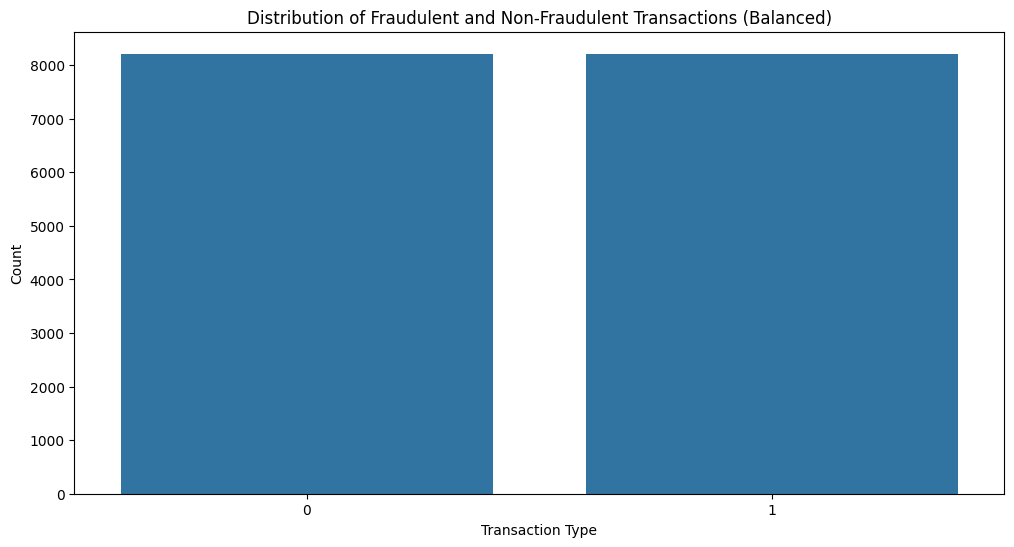

In [34]:
#Deriving plots for fraud and non fraud transactions
plt.figure(figsize=(12, 6))
sns.countplot(x=y_balanced)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions (Balanced)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


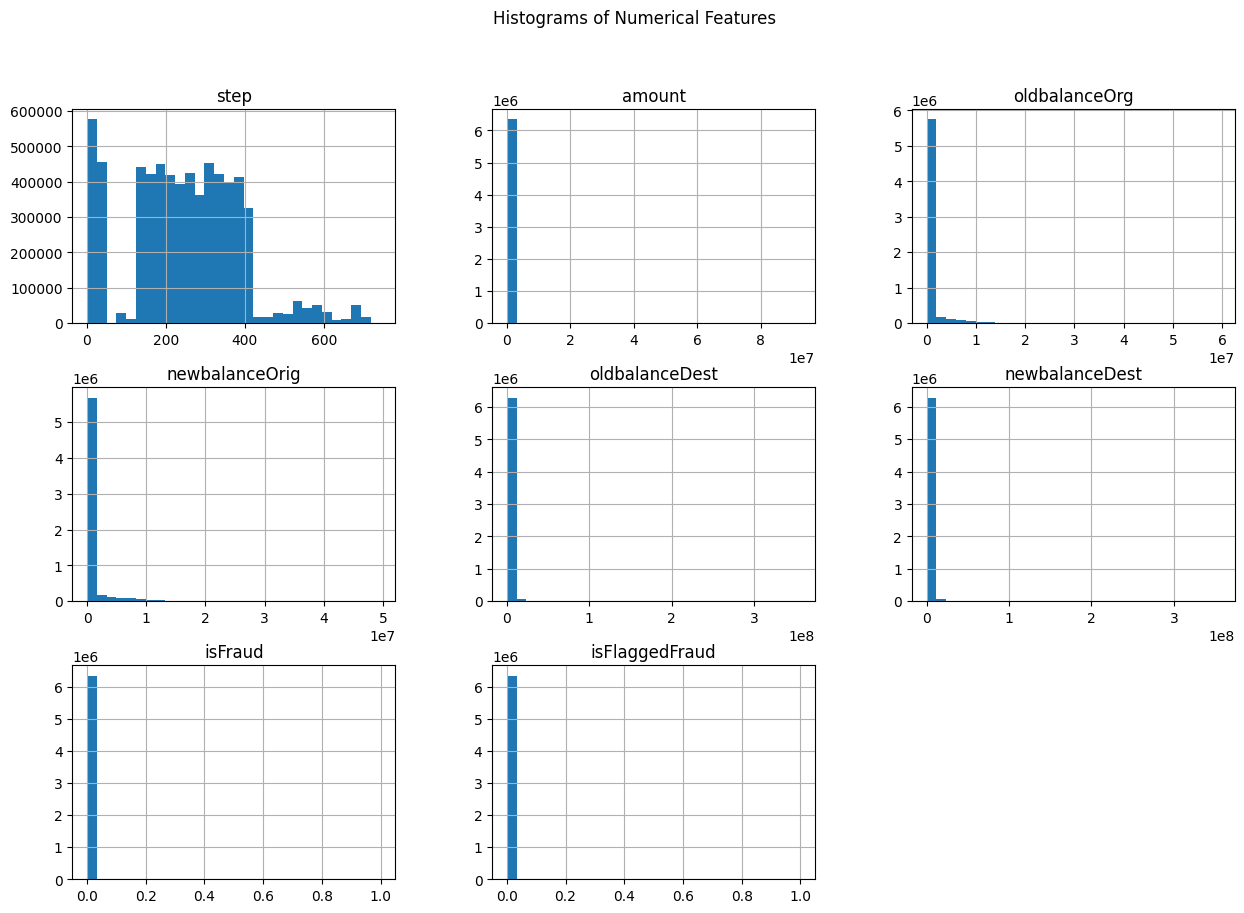

In [26]:
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [29]:
# Add the balanced target back to the balanced features
data_balanced = pd.concat([X_balanced.reset_index(drop=True), y_balanced.reset_index(drop=True)], axis=1)


In [30]:
# Ensuring all columns are numeric before computing the correlation matrix
numeric_columns = data_balanced.select_dtypes(include=[np.number]).columns
data_balanced_numeric = data_balanced[numeric_columns]

In [31]:
# Compute the correlation matrix
correlation_matrix = data_balanced_numeric.corr()

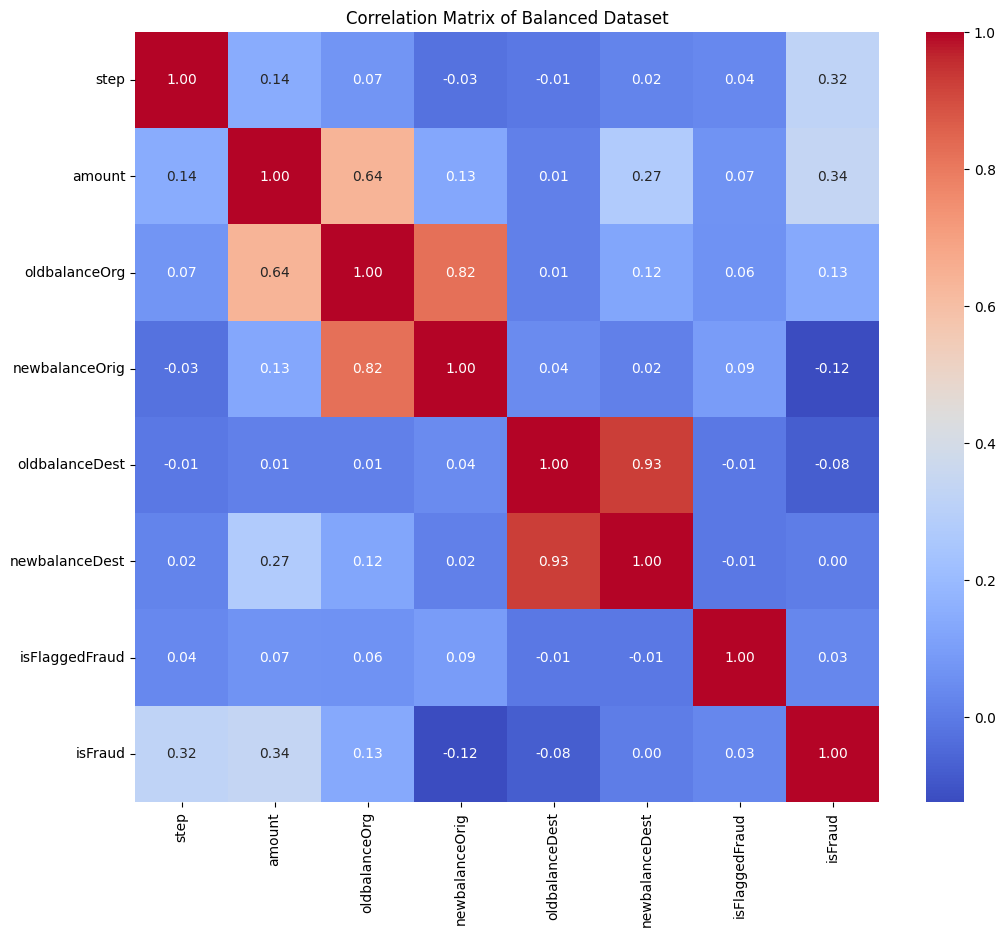

In [32]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Balanced Dataset')
plt.show()